In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gautamseenivasan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
df = pd.read_csv('winemag-data-130k-v2.csv')

In [3]:
df_sentiment = df.copy()

In [4]:
sid = SentimentIntensityAnalyzer()
df_sentiment.reset_index(inplace=True, drop=True)
df_sentiment[['neg', 'neu', 'pos', 'compound']] = df_sentiment['description'].apply(sid.polarity_scores).apply(pd.Series)
df_sentiment

df_sentiment["variety"] = df["variety"]

df_sentiment.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,neg,neu,pos,compound
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,0.000,0.935,0.065,0.1531
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,0.000,0.868,0.132,0.6486
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,0.053,0.947,0.000,-0.1280
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,0.000,0.926,0.074,0.3400
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0.000,0.805,0.195,0.8176


In [5]:
df_sentiment.dropna()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,neg,neu,pos,compound
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0.000,0.805,0.195,0.8176
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,0.000,0.790,0.210,0.8176
23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,0.051,0.949,0.000,-0.3182
25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,0.000,0.904,0.096,0.4019
35,35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath,0.058,0.752,0.190,0.6293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129919,129919,US,"This ripe, rich, almost decadently thick wine ...",Reserve,91,105.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Nicholas Cole Cellars 2004 Reserve Red (Walla ...,Red Blend,Nicholas Cole Cellars,0.000,0.882,0.118,0.8555
129926,129926,US,This pure Syrah from Reininger's estate vineya...,Ash Hollow Vineyard,91,41.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Reininger 2005 Ash Hollow Vineyard Syrah (Wall...,Syrah,Reininger,0.000,0.860,0.140,0.8555
129945,129945,US,Hailing from one of the more popular vineyards...,Jurassic Park Vineyard Old Vines,90,20.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino,0.091,0.879,0.030,-0.6327
129949,129949,US,There's no bones about the use of oak in this ...,Barrel Fermented,90,35.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs,0.040,0.844,0.116,0.6249


In [12]:
df_Italy = pd.DataFrame(df_sentiment["country"].str.contains("Italy"))

In [13]:
df_Italy = df_Italy[df_Italy['country'] == True]
 

df_Italy['description'] = df_sentiment["description"]

df_Italy["variety"] = df_sentiment["variety"]
df_Italy["Sentiment Score"] = df_sentiment["compound"]

df_Italy.head()

,country,description,variety,Sentiment Score
0,True,"Aromas include tropical fruit, broom, brimston...",White Blend,0.1531
6,True,"Here's a bright, informal red that opens with ...",Frappato,0.6369
13,True,This is dominated by oak and oak-driven aromas...,Nerello Mascalese,0.0000
22,True,Delicate aromas recall white flower and citrus...,White Blend,0.7269
24,True,"Aromas of prune, blackcurrant, toast and oak c...",Nero d'Avola,0.0000


In [14]:
df_Italy['Sentiment Score'].mean()

0.48542694984648227

In [15]:
df_US = pd.DataFrame(df_sentiment["country"].str.contains("US"))

df_US = df_US[df_US['country'] == True]
 

df_US['description'] = df_sentiment["description"]

df_US["variety"] = df_sentiment["variety"]
df_US["Sentiment Score"] = df_sentiment["compound"]

df_US.head()

,country,description,variety,Sentiment Score
2,True,"Tart and snappy, the flavors of lime flesh and...",Pinot Gris,-0.1280
3,True,"Pineapple rind, lemon pith and orange blossom ...",Riesling,0.3400
4,True,"Much like the regular bottling from 2012, this...",Pinot Noir,0.8176
10,True,"Soft, supple plum envelopes an oaky structure ...",Cabernet Sauvignon,0.8176
12,True,"Slightly reduced, this wine offers a chalky, t...",Cabernet Sauvignon,0.5574


In [16]:
df_US['Sentiment Score'].mean()

0.5144271209452748

In [17]:
import hvplot.pandas

In [18]:
dfg = df_sentiment.groupby(['country'])['compound'].mean()
#create a bar plot
dfg.hvplot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='country', figsize=(10, 10))

:Bars   [country]   (compound)

In [19]:
dfg = df_sentiment.groupby(['country'])['compound'].mean()
#create a bar plot
dfg.hvplot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='country', figsize=(10, 10))

:Bars   [country]   (compound)

In [20]:
df_Pinot = pd.DataFrame(df_sentiment["variety"].str.contains("Pinot Noir"))

In [21]:
df_Pinot.head()

,variety
0,False
1,False
2,False
3,False
4,True


In [22]:
df_Pinot = df_Pinot[df_Pinot['variety'] == True]

In [23]:
df_Pinot["Sentiment Score"]= df_sentiment["compound"]

df_Pinot["Sentiment Score"].mean()

0.5249989544155387

In [24]:
df_sentiment["variety"].describe()

count         129970
unique           707
top       Pinot Noir
freq           13272
Name: variety, dtype: object

In [25]:
df_sentiment["variety"].count()

129970

In [26]:
df_Chard = pd.DataFrame(df_sentiment["variety"].str.contains("Chardonnay"))

In [27]:
df_Chard = df_Chard[df_Chard['variety'] == True]

In [28]:
df_Chard["Sentiment Score"]= df_sentiment["compound"]

df_Chard["Sentiment Score"].mean()

0.5393140962135935

In [29]:
filter = df_sentiment["price"] > 100

expensive_wine = df_sentiment.loc[filter]

expensive_wine.dropna()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,neg,neu,pos,compound
362,362,US,As impressive as the woman—a pioneer in the Na...,Jamie,95,200.0,California,Diamond Mountain District,Napa,Virginie Boone,@vboone,J. Davies 2012 Jamie Cabernet Sauvignon (Diamo...,Cabernet Sauvignon,J. Davies,0.0,0.746,0.254,0.9403
547,547,US,Deep aromas of dried strawberries and blueberr...,Stolpman Vineyard,93,150.0,California,Ballard Canyon,Central Coast,Matt Kettmann,@mattkettmann,Turiya 2011 Stolpman Vineyard Sangiovese (Ball...,Sangiovese,Turiya,0.0,0.920,0.080,0.6570
778,778,US,The Winderlea is perhaps the most unique in te...,Winderlea Vineyard,92,105.0,Oregon,Dundee Hills,Willamette Valley,Paul Gregutt,@paulgwine,Adelsheim 2010 Winderlea Vineyard Pinot Noir (...,Pinot Noir,Adelsheim,0.0,0.920,0.080,0.5859
787,787,US,"Robust black fruit forms around a dense, leath...",Rutherford Estate Vineyard,90,125.0,California,Rutherford,Napa,Virginie Boone,@vboone,St. Supéry 2013 Rutherford Estate Vineyard Cab...,Cabernet Sauvignon,St. Supéry,0.0,0.791,0.209,0.8020
1019,1019,US,"Estate bottled, this assemblage of 77% Caberne...",Elivette,88,125.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Spring Mountain Vineyard 2011 Elivette Red (Na...,Bordeaux-style Red Blend,Spring Mountain Vineyard,0.0,0.882,0.118,0.7717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129298,129298,US,"Rich as chocolate cake, this bold wine is ador...",Out of Sight Vineyard,90,125.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Flora Springs 2014 Out of Sight Vineyard Caber...,Cabernet Sauvignon,Flora Springs,0.0,0.672,0.328,0.9042
129549,129549,US,Minty cedar rides atop an expansive succulence...,Walther River Block Estate,93,135.0,California,Rutherford,Napa,Virginie Boone,@vboone,D.R. Stephens 2014 Walther River Block Estate ...,Cabernet Sauvignon,D.R. Stephens,0.0,0.642,0.358,0.9287
129559,129559,US,This wine is a blend of 79% Cabernet Sauvignon...,Reserve,93,150.0,Washington,Walla Walla Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Leonetti Cellar 2014 Reserve Red (Walla Walla ...,Bordeaux-style Red Blend,Leonetti Cellar,0.0,0.808,0.192,0.9542
129725,129725,US,"This robust wine is made from 62% Merlot, 37% ...",Reserve,90,140.0,California,Sonoma County-Napa County,Napa-Sonoma,Virginie Boone,@vboone,Pride Mountain 2013 Reserve Claret (Sonoma Cou...,Claret,Pride Mountain,0.0,0.938,0.062,0.3400


In [30]:
filter2 = df_sentiment["price"] <25

cheap_wine = df_sentiment.loc[filter2]

cheap_wine.dropna()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,neg,neu,pos,compound
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,0.000,0.790,0.210,0.8176
23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,0.051,0.949,0.000,-0.3182
84,84,US,A healthy addition of 13% Petite Sirah provide...,Classic,86,24.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Napa Cellars 2014 Classic Zinfandel (Napa Valley),Zinfandel,Napa Cellars,0.000,0.811,0.189,0.6808
90,90,US,"This blend of Sangiovese, Malbec, Cabernet Sau...",Siena,88,23.0,California,Sonoma County,Sonoma,Virginie Boone,@vboone,Ferrari-Carano 2014 Siena Red (Sonoma County),Red Blend,Ferrari-Carano,0.000,0.758,0.242,0.8481
94,94,US,"Barrel notes are prominent, with aromas of Cre...",Grand Klasse Reserve Lawrence Vineyards,88,22.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Gård 2014 Grand Klasse Reserve Lawrence Vineya...,Viognier,Gård,0.000,0.955,0.045,0.1655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129840,129840,US,The entry is oaky and the fruit light; it seem...,Chateau Puryear Vineyard,86,20.0,Washington,Rattlesnake Hills,Columbia Valley,Paul Gregutt,@paulgwine,Bonair 2006 Chateau Puryear Vineyard Merlot (R...,Merlot,Bonair,0.000,1.000,0.000,0.0000
129855,129855,US,"While a minuscule amount of this was made, it ...",Rosé of,90,20.0,California,Carneros,Napa-Sonoma,Virginie Boone,@vboone,Belharra 2015 Rosé of Syrah (Carneros),Syrah,Belharra,0.000,0.842,0.158,0.7351
129879,129879,US,"This wine is a blend of 45% Grenache, 37% Syra...",Metis,90,20.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Maison Bleue 2013 Metis Red (Columbia Valley (...,Red Blend,Maison Bleue,0.000,0.903,0.097,0.7184
129909,129909,US,"Hailing from an extreme coastal vineyard, this...",Derbyshire Vineyard,91,20.0,California,San Luis Obispo County,Central Coast,Matt Kettmann,@mattkettmann,Derby 2015 Derbyshire Vineyard Pinot Gris (San...,Pinot Gris,Derby,0.000,1.000,0.000,0.0000


In [31]:
cheap_wine["points"].mean()

86.79982333110995

In [32]:
cheap_wine["compound"].mean()

0.48668401507095665

In [33]:
expensive_wine["points"].mean()

92.82055852644088

In [34]:
expensive_wine["compound"].mean()

0.620694177064763

In [35]:
dfg2 = cheap_wine.groupby(['country'])['compound'].mean()
#create a bar plot
dfg2.hvplot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='country', figsize=(10, 10))

:Bars   [country]   (compound)

In [36]:
dfg3 = expensive_wine.groupby(['country'])['compound'].mean()
#create a bar plot
dfg3.hvplot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='country', figsize=(10, 10))

:Bars   [country]   (compound)

In [37]:
filter3 = df_sentiment["compound"] < -0.6

bad_wine_country = df_sentiment.loc[filter3]

bad_wine_country.dropna()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,neg,neu,pos,compound
863,863,US,Lighter bramble and red-currant fruits pop on ...,Rio Vista Vineyard,90,45.0,California,Sta. Rita Hills,Central Coast,Matt Kettmann,@mattkettmann,West of Temperance 2012 Rio Vista Vineyard Pin...,Pinot Noir,West of Temperance,0.157,0.843,0.00,-0.7906
5103,5103,US,An aromatically appealing wine with notes of c...,Reserve,86,24.0,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Canoe Ridge 2010 Reserve Cabernet Sauvignon (H...,Cabernet Sauvignon,Canoe Ridge,0.214,0.786,0.00,-0.6003
6489,6489,US,"This dull, tired wine is quickly moving past d...",Estate Reserve,82,35.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Wetzel Estate 2012 Estate Reserve Pinot Noir (...,Pinot Noir,Wetzel Estate,0.248,0.752,0.00,-0.6808
11620,11620,US,"There's a funky, foxy note and a sour edge to ...",Trouble,85,30.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,A Blooming Hill Vineyard 2015 Trouble Pinot No...,Pinot Noir,A Blooming Hill Vineyard,0.158,0.842,0.00,-0.6151
14341,14341,US,Oxidized almost to the point of being tawny in...,Serenity Vineyard,80,15.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Namasté Vineyards 2006 Serenity Vineyard Chard...,Chardonnay,Namasté Vineyards,0.172,0.828,0.00,-0.6124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127155,127155,US,"A 50-50 Cabernet/Syrah blend, this is heavily ...",Confluence Red Blend,83,25.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Cedar River Cellars 2010 Confluence Red Blend ...,Red Blend,Cedar River Cellars,0.214,0.786,0.00,-0.7003
127203,127203,US,On the verge of their 100th anniversary as a v...,Stormwatch Estate Reserve,94,70.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,San Simeon 2013 Stormwatch Estate Reserve Red ...,Bordeaux-style Red Blend,San Simeon,0.098,0.902,0.00,-0.7162
128849,128849,US,"Earthy elements of beet juice, wild raspberry,...",Mills Vineyard,92,58.0,California,Mt. Harlan,Central Coast,Matt Kettmann,@mattkettmann,Calera 2012 Mills Vineyard Pinot Noir (Mt. Har...,Pinot Noir,Calera,0.097,0.903,0.00,-0.6597
129609,129609,US,Not as good as Darcie Kent's Crown Block Merlo...,Picazo Vineyard,84,24.0,California,Livermore Valley,Central Coast,Virginie Boone,@vboone,Darcie Kent Vineyards 2008 Picazo Vineyard Mer...,Merlot,Darcie Kent Vineyards,0.142,0.858,0.00,-0.6492


In [38]:
bad_wine_country["points"].mean()

84.89889196675901

In [39]:
bad_wine_country["price"].mean()

28.612716763005782

In [40]:
filter4 = df_sentiment["compound"] > 0.9

exotic_wine_country = df_sentiment.loc[filter4]

exotic_wine_country.dropna()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,neg,neu,pos,compound
147,147,US,"Black cherry, black plum and black currant are...",Family Reserve,91,68.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Vincent Vineyards 2012 Family Reserve Cabernet...,Cabernet Sauvignon,Vincent Vineyards,0.000,0.744,0.256,0.9386
168,168,US,"A fairly elegant expression of the variety, th...",Rector Creek Vineyard,91,95.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Duckhorn 2012 Rector Creek Vineyard Merlot (Na...,Merlot,Duckhorn,0.000,0.772,0.228,0.9081
362,362,US,As impressive as the woman—a pioneer in the Na...,Jamie,95,200.0,California,Diamond Mountain District,Napa,Virginie Boone,@vboone,J. Davies 2012 Jamie Cabernet Sauvignon (Diamo...,Cabernet Sauvignon,J. Davies,0.000,0.746,0.254,0.9403
409,409,US,Fresh and delicate with floral and citrus over...,Dry,85,20.0,New York,Finger Lakes,Finger Lakes,Susan Kostrzewa,@suskostrzewa,McGregor 2007 Dry Gewürztraminer (Finger Lakes),Gewürztraminer,McGregor,0.000,0.657,0.343,0.9287
431,431,US,This Tempranillo-based pinkie is quite invitin...,Indie,89,24.0,California,Templeton Gap District,Central Coast,Matt Kettmann,@mattkettmann,ONX 2015 Indie Tempranillo (Templeton Gap Dist...,Tempranillo,ONX,0.000,0.753,0.247,0.9254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129660,129660,US,"From a fine site farmed by Steve Matthiasson, ...",Linda Vista Vineyard,93,32.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Donkey & Goat 2015 Linda Vista Vineyard Chardo...,Chardonnay,Donkey & Goat,0.000,0.710,0.290,0.9313
129664,129664,US,This is one of the best Lodi Native wine yet. ...,Lodi Native Marian's Vineyard,93,35.0,California,Mokelumne River,Central Valley,Jim Gordon,@gordone_cellars,St. Amant 2014 Lodi Native Marian's Vineyard Z...,Zinfandel,St. Amant,0.000,0.802,0.198,0.9231
129815,129815,US,"Showing excellent varietal character, this lig...",Underwood Mountain Vineyard,89,20.0,Washington,Columbia Gorge (WA),Washington Other,Paul Gregutt,@paulgwine,Syncline 2010 Underwood Mountain Vineyard Grün...,Grüner Veltliner,Syncline,0.000,0.711,0.289,0.9218
129821,129821,US,"Two thirds Tempranillo, this Spanish-style red...",Corrida,89,30.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Brian Carter Cellars 2008 Corrida Red (Columbi...,Red Blend,Brian Carter Cellars,0.026,0.774,0.200,0.9109


In [41]:
exotic_wine_country["points"].mean()


90.3507574621269

In [42]:
exotic_wine_country["price"].mean()

45.40950373013299

:Bars   [country]   (compound)

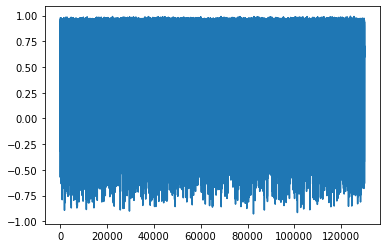

In [43]:
df_sentiment["compound"].plot()

sentiment_by_country = df_sentiment.groupby(['country'])['compound'].mean()
#create a bar plot
dfg2.hvplot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='country', figsize=(10, 10))

In [48]:
sentiment_by_country.head()

country
Argentina                 0.301883
Armenia                   0.541050
Australia                 0.464342
Austria                   0.656658
Bosnia and Herzegovina    0.343550
Name: compound, dtype: float64

In [54]:
expensive_wine["variety"].max()
#most expensive wine

'White Blend'

In [63]:
white_blend = df_sentiment["variety"].str.contains("White Blend")
white_blend["price"] = df_sentiment["price"]

In [65]:
white_blend["price"].max()

3300.0

In [68]:
price_by_country = df_sentiment.groupby(['country'])['price'].mean()
#create a bar plot
price_by_country.hvplot(kind='bar', title='Price', ylabel='Mean Price',
         xlabel='country', figsize=(10, 10))

:Bars   [country]   (price)

In [76]:
price_by_country.head()

country
Argentina                 24.510117
Armenia                   14.500000
Australia                 35.437663
Austria                   30.762772
Bosnia and Herzegovina    12.500000
Name: price, dtype: float64